In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
def bernoulli(p):
    return np.random.binomial(1, p)


In [ ]:
#EPSILON-GREEDY POLICY
class Simulation:
  def __init__(self, e, T, prob, isGreedy, field):
    self.epsilon = e
    self.trials = T
    self.probs = prob
    self.isGreedy = isGreedy
      
    #PARAMETERS
    self.field = field
    self.num_actions = len(prob)

    #STORE
    self.total_rewards = np.zeros(self.num_actions, dtype = np.longdouble)
    self.total_counts = np.zeros(self.num_actions, dtype = np.longdouble)
    self.cumulative_rewards = np.zeros(self.trials, dtype = np.longdouble)
    self.regrets = np.zeros(self.trials, dtype = np.longdouble)

    #THOMPSON SAMPLING
    self.alpha = np.ones(self.num_actions)
    self.beta = np.ones(self.num_actions)


  
  def act(self):
      if self.isGreedy:
        choice = None
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
                
        if choice == 1:
            return np.random.choice(self.num_actions)
        else:
            current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
            current_averages[self.total_counts <= 0] = 0  #Correctly handles Bernoulli rewards; over-estimates otherwise      
            max_value = np.max(current_averages)
            max_vals = np.where(current_averages == max_value)[0]
            current_action = np.random.choice(max_vals)
            return current_action
      
      else:
        theta = np.random.beta(self.alpha, self.beta)
        return theta.argmax()




  def env(self, action):
      r = bernoulli(self.probs[action])
      self.total_rewards[action] += r
      self.total_counts[action] += 1

      if not self.isGreedy:
        self.alpha[action] += r
        self.beta[action] += 1 - r
      return r



  def simulate(self):
      cr = 0
      regret = 0
      for i in range(self.trials):
          actions = np.zeros(self.field)
          rewards = np.zeros(self.field)
          
          for k in range(self.field):
            actions[k] = self.act()
            
          
          for k in range(self.field):
            r = self.env(int(actions[k]))
            rewards[k] = r
            cr+=r
            if r==0:
              regret += max(self.probs)-self.probs[int(actions[k])]
            
            self.regrets[i] = regret
            self.cumulative_rewards[i] = cr
          print(i, self.total_counts, self.total_rewards)



In [ ]:
import numpy as np

a = []

a.append([5,1,3])
a.append([8,10,12])
print(a)

[[5, 1, 3], [8, 10, 12]]


0 [ 5. 10. 15.] [1. 1. 0.]
1 [35. 10. 15.] [4. 1. 0.]
2 [65. 10. 15.] [10.  1.  0.]
3 [95. 10. 15.] [12.  1.  0.]
4 [125.  10.  15.] [14.  1.  0.]
5 [155.  10.  15.] [16.  1.  0.]
6 [185.  10.  15.] [21.  1.  0.]
7 [215.  10.  15.] [24.  1.  0.]
8 [245.  10.  15.] [27.  1.  0.]
9 [275.  10.  15.] [28.  1.  0.]
10 [305.  10.  15.] [30.  1.  0.]
11 [305.  40.  15.] [30.  1.  0.]
12 [335.  40.  15.] [31.  1.  0.]
13 [365.  40.  15.] [36.  1.  0.]
14 [395.  40.  15.] [39.  1.  0.]
15 [425.  40.  15.] [41.  1.  0.]
16 [455.  40.  15.] [41.  1.  0.]
17 [485.  40.  15.] [45.  1.  0.]
18 [515.  40.  15.] [48.  1.  0.]
19 [545.  40.  15.] [50.  1.  0.]
20 [575.  40.  15.] [53.  1.  0.]
21 [605.  40.  15.] [56.  1.  0.]
22 [635.  40.  15.] [58.  1.  0.]
23 [665.  40.  15.] [61.  1.  0.]
24 [695.  40.  15.] [68.  1.  0.]
25 [725.  40.  15.] [70.  1.  0.]
26 [755.  40.  15.] [73.  1.  0.]
27 [785.  40.  15.] [75.  1.  0.]
28 [815.  40.  15.] [76.  1.  0.]
29 [845.  40.  15.] [80.  1.  0.]
30 [875.

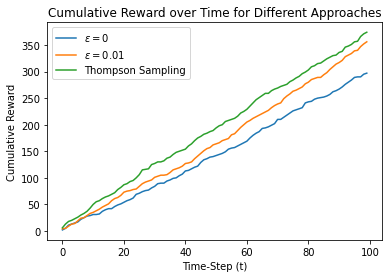

In [ ]:
#PARAMETERS
trials = 100
iterations = 1
epsilons = [0, 0.01]
field = 30
arms = 3

t = range(trials)
fig, ax = plt.subplots()
storage = []
storage2 = []

#EPSILON-GREEDY

for e in range(len(epsilons)):
  average_regrets = np.zeros(trials, dtype = np.longdouble)
  crs = np.zeros(trials, dtype = np.longdouble)
  for i in range(iterations):

    game = Simulation(epsilons[e], trials, [0.11, 0.08, 0.13], True, field)
    game.simulate()
    average_regrets += game.regrets
    crs += game.cumulative_rewards

  average_regrets /= iterations
  crs = game.cumulative_rewards
  storage.append(average_regrets)
  storage2.append(average_cr)
  ax.plot(t, crs)


#THOMPSON-SAMPLING
average_regrets = np.zeros(trials, dtype = np.longdouble)
crs = np.zeros(trials, dtype = np.longdouble)
for i in range(iterations):
  game = Simulation(epsilons[e], trials, [0.11, 0.08, 0.13], False, field)
  game.simulate()
  average_regrets += game.regrets
  crs += game.cumulative_rewards

average_regrets /= iterations
crs /= iterations
print(crs)
storage.append(average_regrets)
ax.plot(t, crs)


plt.title(r'Cumulative Reward over Time for Different Approaches')
plt.xlabel('Time-Step (t)')
plt.ylabel('Cumulative Reward')
plt.legend([r'$\epsilon=0$', r'$\epsilon=0.01$', r'Thompson Sampling'])

plt.savefig("CR.png",dpi=300)

In [ ]:
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.save(outfile, storage)

In [ ]:
_ = outfile.seek(0) # Only needed here to simulate closing & reopening file
np.load(outfile)

array([[ 12.58082147,  13.81368434,  14.54325759,  15.15383065,
         15.71126017,  16.28953394,  16.90859344,  17.43406676,
         17.93258771,  18.44935912,  19.03120726,  19.54821676,
         20.0795204 ,  20.58287854,  21.08770329,  21.59703721,
         22.11041119,  22.62399114,  23.14269234,  23.67435704,
         24.19174592,  24.70104064,  25.18333184,  25.67644403,
         26.15761884,  26.63294442,  27.10382873,  27.57142782,
         28.01209176,  28.46210369,  28.91934062,  29.37515634,
         29.82752945,  30.27548059,  30.7377554 ,  31.18945374,
         31.652686  ,  32.10767745,  32.5585008 ,  33.01239336,
         33.46653944,  33.92669924,  34.39423546,  34.83694658,
         35.30492468,  35.77300499,  36.248706  ,  36.70766149,
         37.16145994,  37.61879395,  38.07031499,  38.52429025,
         38.98494985,  39.43376556,  39.88381304,  40.31760688,
         40.77254574,  41.23230766,  41.69151656,  42.14704347,
         42.60486939,  43.05246716,  43.

In [ ]:

histArray = [1]*int(game.total_counts[0]) + [2]*int(game.total_counts[1]) + [3]*int(game.total_counts[2])
plt.hist(histArray, 50)

SyntaxError: ignored

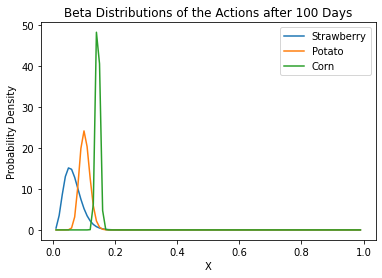

In [ ]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
x = np.arange (0.01, 1, 0.01)


y = beta.pdf(x,5,72)
plt.plot(x,y)

y = beta.pdf(x,34,298)
plt.plot(x,y)

y = beta.pdf(x,375,2222)
plt.plot(x,y)

plt.title(r'Beta Distributions of the Actions after 100 Days')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend([r'Strawberry', r'Potato', 'Corn'])
plt.savefig("Day3.png",dpi=300)

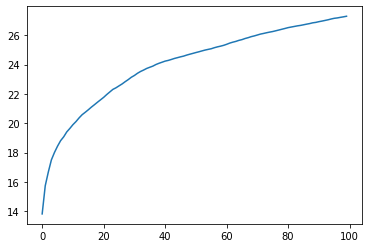

In [ ]:
#PARAMETERS
trials = 100
iterations = 50


t = range(trials)
fig, ax = plt.subplots()


average_regrets = np.zeros(trials, dtype = np.longdouble)
for i in range(iterations):

  p1 = np.random.uniform(0, 0.5)
  p2 = np.random.uniform(0, 0.5)
  p3 = np.random.uniform(0, 0.5)
  game = Simulation(epsilons[e], trials, [p1, p2, p3], False)
  game.simulate()
  average_regrets += game.regrets

average_regrets /= iterations
ax.plot(t, average_regrets)

plt.show()